In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
df = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/ENTRI/superstore-sales-analysis/cleaned_data.csv")

In [44]:
sns.set(style="whitegrid")

In [46]:
X = df[['Quantity', 'Discount', 'Profit']]
y = df['Sales']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔸 Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

🔸 Linear Regression
MAE: 245.0755698445028
MSE: 680377.4563719591
R2 Score: -0.1518172010606389


In [52]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n🔸 Decision Tree Regressor")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))


🔸 Decision Tree Regressor
MAE: 110.2950331999333
MSE: 310658.1686091845
R2 Score: 0.4740839531014154


In [54]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔸 Random Forest Regressor")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


🔸 Random Forest Regressor
MAE: 101.83695414226369
MSE: 263098.9895720715
R2 Score: 0.5545973210418746


In [55]:
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='teal')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(f'{model_name}: Actual vs Predicted Sales')
    plt.tight_layout()
    plt.show()

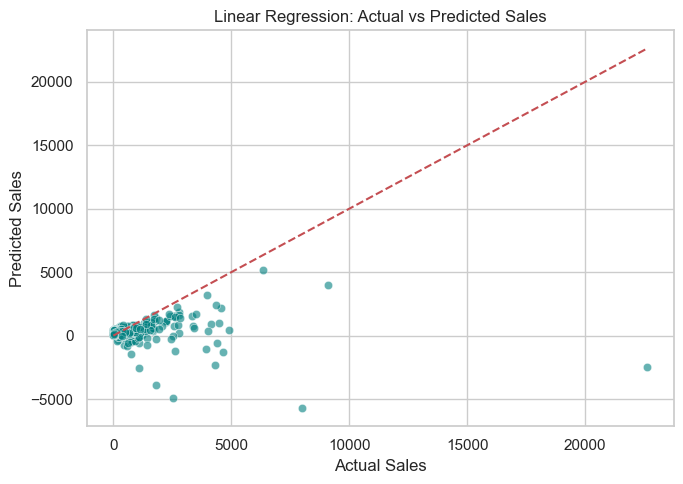

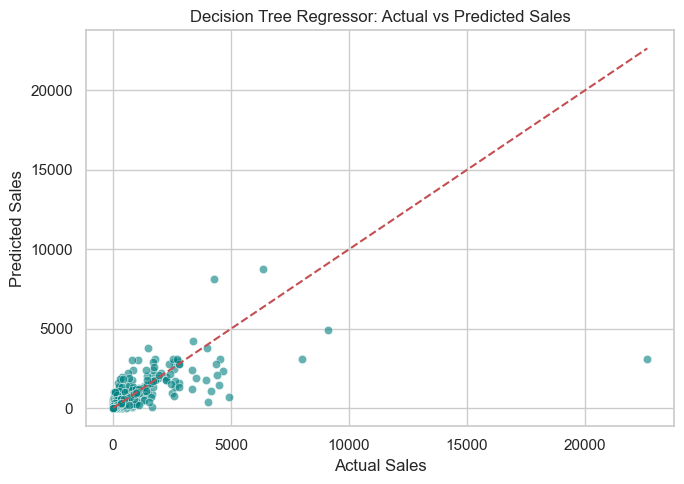

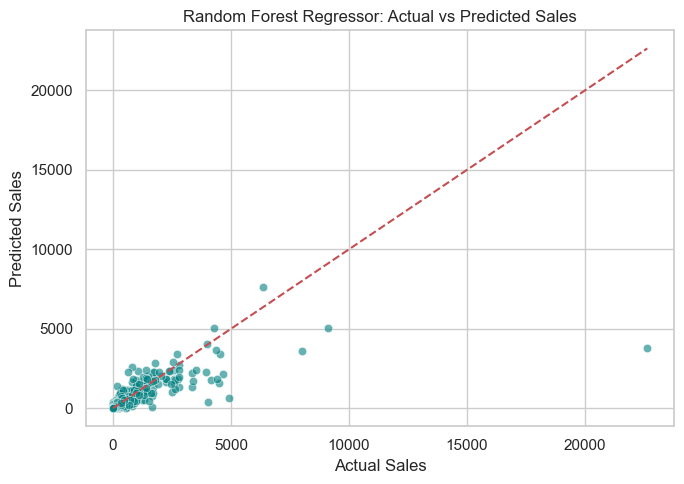

In [58]:
plot_predictions(y_test, y_pred_lr, 'Linear Regression')
plot_predictions(y_test, y_pred_dt, 'Decision Tree Regressor')
plot_predictions(y_test, y_pred_rf, 'Random Forest Regressor')

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)


mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'R2': [r2_lr, r2_dt, r2_rf]
}


metrics_df = pd.DataFrame(metrics)


print(metrics_df)


               Model         MAE            MSE        R2
0  Linear Regression  245.075570  680377.456372 -0.151817
1      Decision Tree  111.420583  311903.142206  0.471976
2      Random Forest  101.272050  270402.365785  0.542233


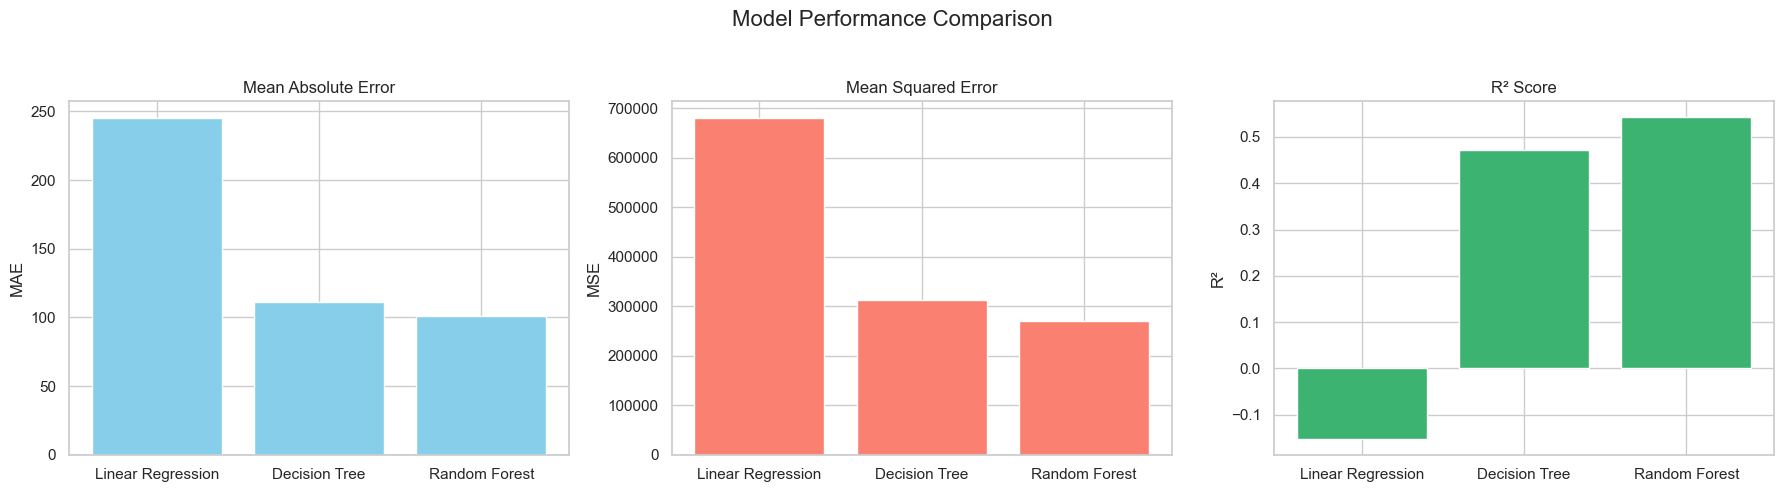

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'R2': [r2_lr, r2_dt, r2_rf]
}


metrics_df = pd.DataFrame(metrics)


fig, axes = plt.subplots(1, 3, figsize=(18, 5))


axes[0].bar(metrics_df['Model'], metrics_df['MAE'], color='skyblue')
axes[0].set_title('Mean Absolute Error')
axes[0].set_ylabel('MAE')


axes[1].bar(metrics_df['Model'], metrics_df['MSE'], color='salmon')
axes[1].set_title('Mean Squared Error')
axes[1].set_ylabel('MSE')


axes[2].bar(metrics_df['Model'], metrics_df['R2'], color='mediumseagreen')
axes[2].set_title('R² Score')
axes[2].set_ylabel('R²')

plt.suptitle('Model Performance Comparison', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [82]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Evaluation Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    return {'Model': name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}


In [88]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # This will now work after importing numpy
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Evaluation Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    return {'Model': name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}


results = []
results.append(evaluate_model("Linear Regression", y_test, lr_preds))
results.append(evaluate_model("Decision Tree", y_test, dt_preds))
results.append(evaluate_model("Random Forest", y_test, rf_preds))


for result in results:
    print(result)



Linear Regression Evaluation Metrics:
MAE: 245.08
MSE: 680377.46
RMSE: 824.85
R² Score: -0.1518

Decision Tree Evaluation Metrics:
MAE: 111.42
MSE: 311903.14
RMSE: 558.48
R² Score: 0.4720

Random Forest Evaluation Metrics:
MAE: 101.27
MSE: 270402.37
RMSE: 520.00
R² Score: 0.5422
{'Model': 'Linear Regression', 'MAE': 245.0755698445028, 'MSE': 680377.4563719591, 'RMSE': 824.8499599151103, 'R2': -0.1518172010606389}
{'Model': 'Decision Tree', 'MAE': 111.42058327497082, 'MSE': 311903.142206186, 'RMSE': 558.4828933872425, 'R2': 0.47197632594466155}
{'Model': 'Random Forest', 'MAE': 101.27204963724064, 'MSE': 270402.3657854871, 'RMSE': 520.002274788762, 'R2': 0.5422333688420382}


In [90]:
results_df = pd.DataFrame(results)

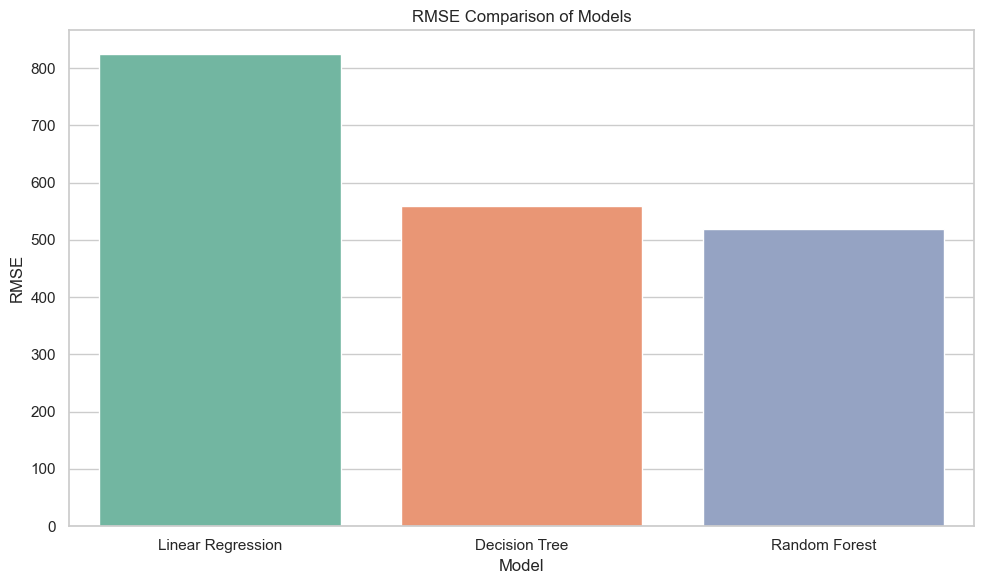

In [138]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='RMSE', data=results_df, hue='Model', palette='Set2')
plt.title("RMSE Comparison of Models")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

In [94]:
#1. Sales vs Profit by Sub-Category

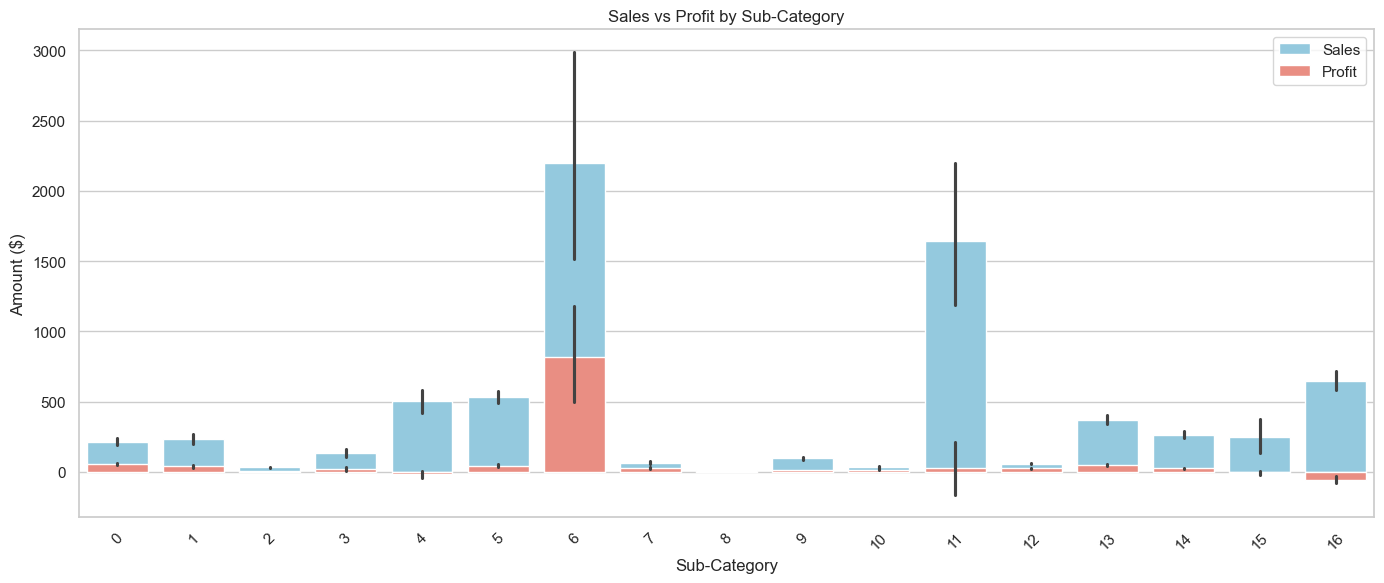

In [96]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Sub-Category', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=df, x='Sub-Category', y='Profit', color='salmon', label='Profit')

plt.xticks(rotation=45)
plt.title("Sales vs Profit by Sub-Category")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()
plt.show()

In [98]:
#2. Top 10 States by Sales

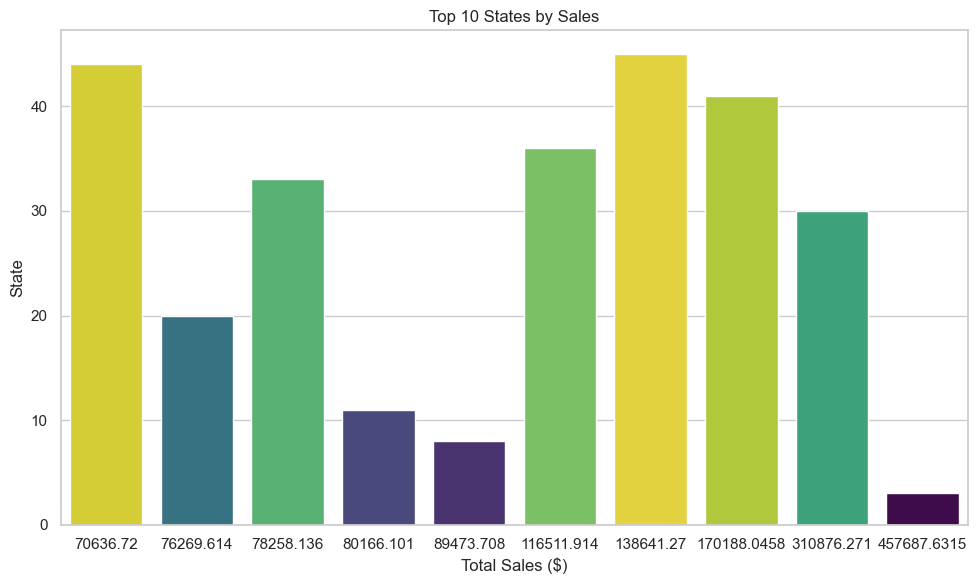

In [100]:
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, hue=top_states.index, palette='viridis', legend=False)
plt.title("Top 10 States by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

In [102]:
#3. Profit by Region

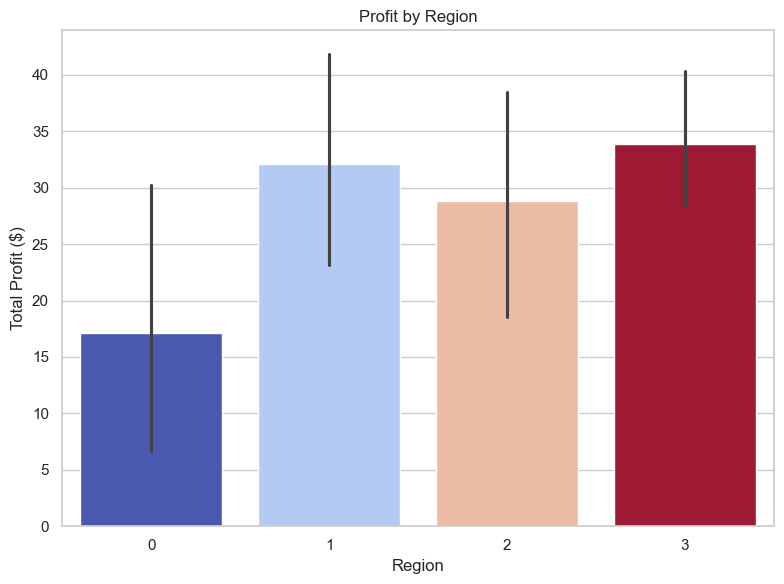

In [106]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Region', y='Profit', hue='Region', palette='coolwarm', legend=False)
plt.title("Profit by Region")
plt.ylabel("Total Profit ($)")
plt.tight_layout()
plt.show()

In [108]:
#4. Shipping Delay: Ship Date vs Order Date

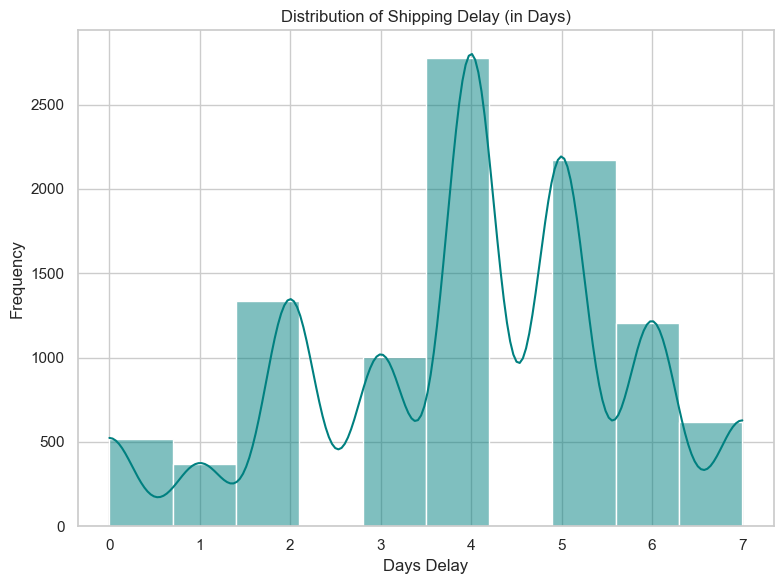

In [110]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed', dayfirst=True, errors='coerce')

df['Shipping Delay (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

plt.figure(figsize=(8, 6))
sns.histplot(df['Shipping Delay (Days)'], bins=10, kde=True, color='teal')
plt.title("Distribution of Shipping Delay (in Days)")
plt.xlabel("Days Delay")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [112]:
# 5. Sales by Customer Segment

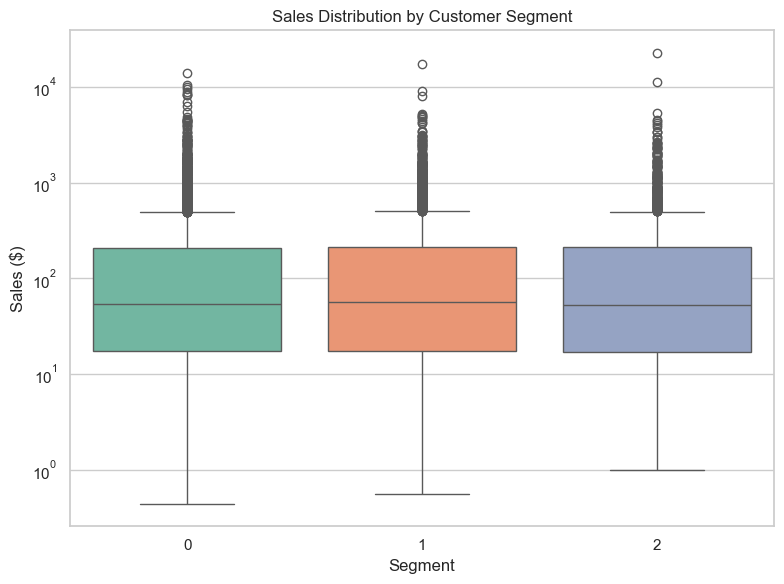

In [114]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Segment', y='Sales', hue='Segment', palette='Set2', legend=False)
plt.yscale('log')  # Log scale to handle outliers
plt.title("Sales Distribution by Customer Segment")
plt.ylabel("Sales ($)")
plt.tight_layout()
plt.show()

In [116]:
#6. Category-wise Sales and Profit

<Figure size 1000x500 with 0 Axes>

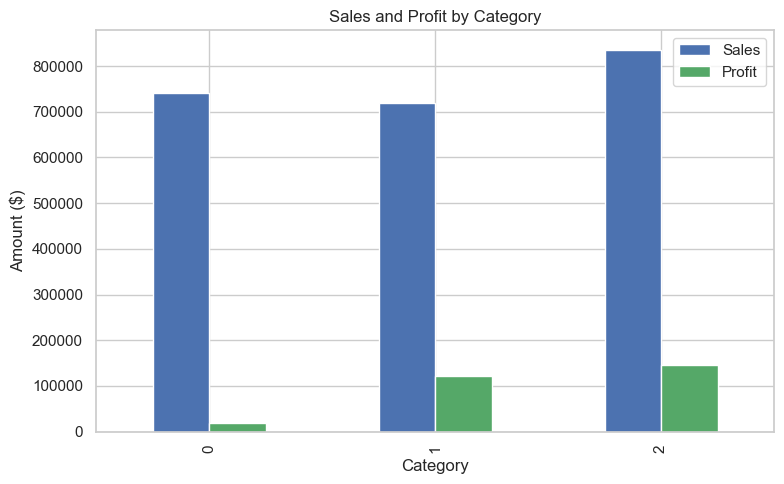

In [118]:
cat = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(10, 5))
cat.plot(kind='bar', x='Category', stacked=False, figsize=(8, 5), color=['#4c72b0', '#55a868'])
plt.title("Sales and Profit by Category")
plt.ylabel("Amount ($)")
plt.tight_layout()
plt.show()

In [120]:
#7. Monthly Sales Trend

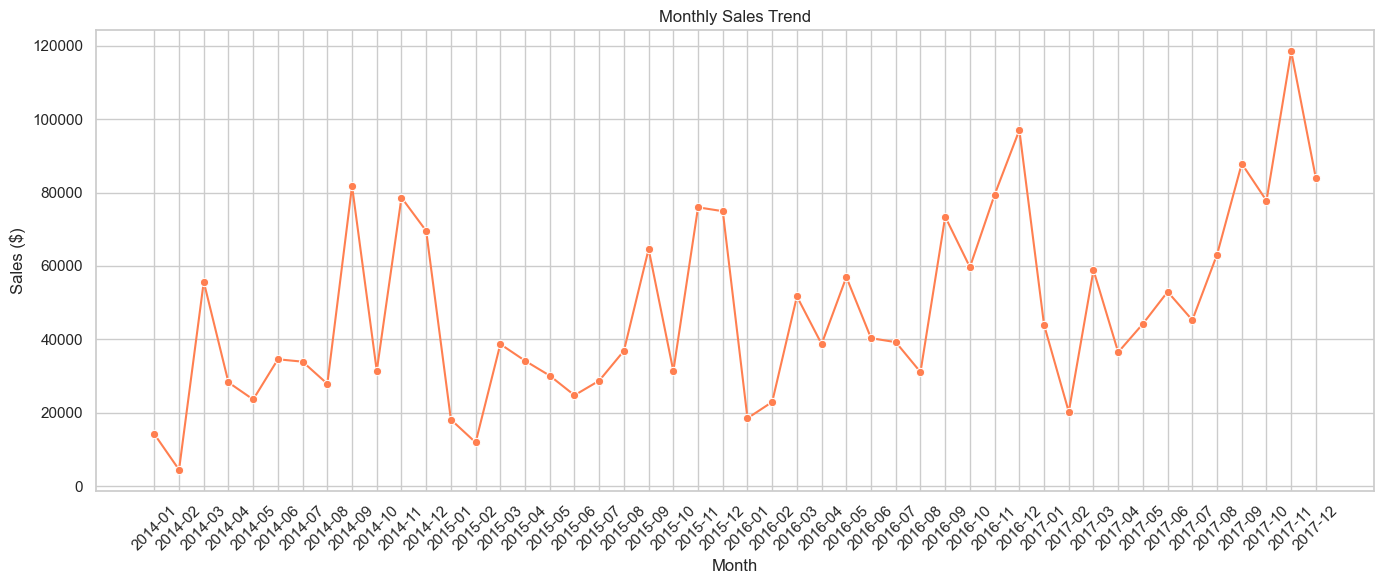

In [122]:
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', color='coral')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.ylabel("Sales ($)")
plt.tight_layout()
plt.show()

In [124]:
 # Final Visual Analysis with Insights

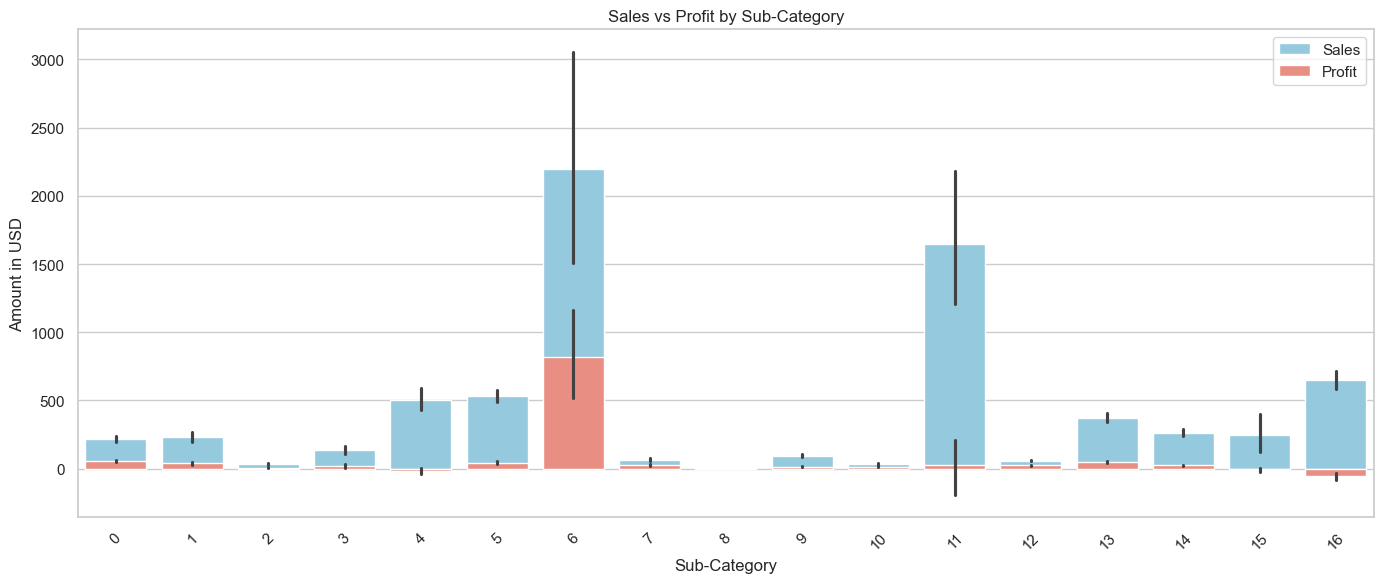

📝 Insight: Some sub-categories like 'Chairs' and 'Tables' have high sales but low or negative profits, indicating inefficiency or discounting.


In [126]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Sub-Category', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=df, x='Sub-Category', y='Profit', color='salmon', label='Profit')
plt.title('Sales vs Profit by Sub-Category')
plt.ylabel('Amount in USD')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print("📝 Insight: Some sub-categories like 'Chairs' and 'Tables' have high sales but low or negative profits, indicating inefficiency or discounting.")


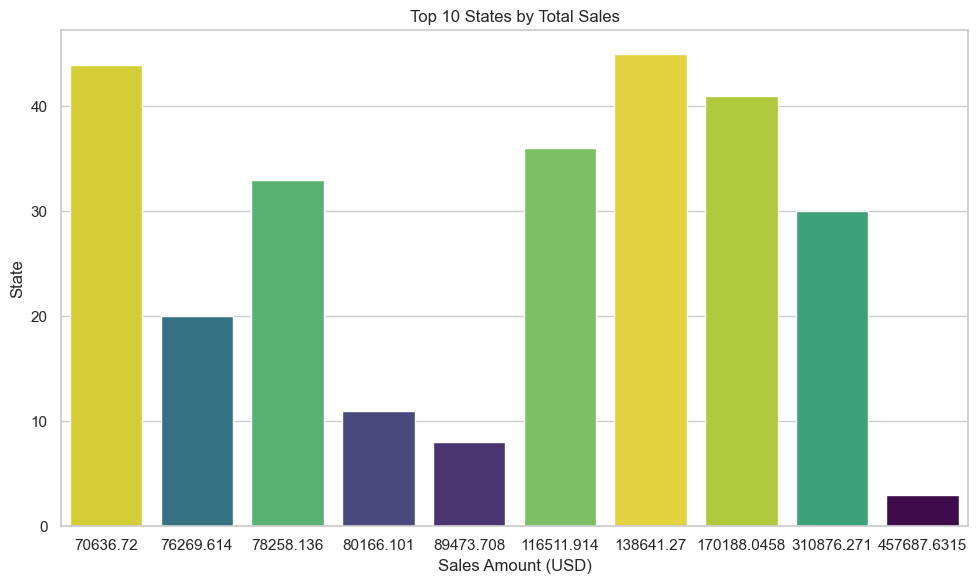

📝 Insight: California and New York contribute the highest to overall sales, making them priority regions.


In [128]:
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_states.values, y=top_states.index, hue=top_states.index, legend=False, palette='viridis')
plt.title('Top 10 States by Total Sales')
plt.xlabel('Sales Amount (USD)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

print("📝 Insight: California and New York contribute the highest to overall sales, making them priority regions.")


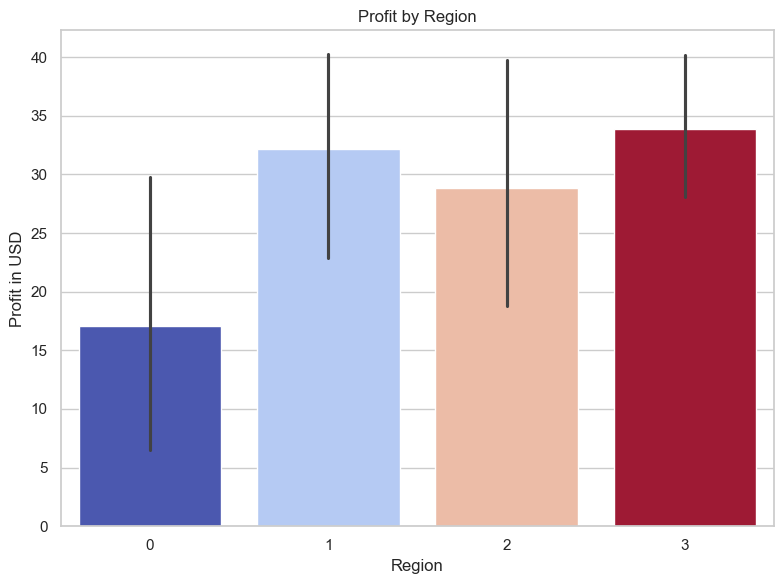

📝 Insight: Western and Eastern regions show healthy profits, while Southern region profits are comparatively lower.


In [130]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Region', y='Profit', hue='Region', legend=False, palette='coolwarm')
plt.title('Profit by Region')
plt.ylabel('Profit in USD')
plt.tight_layout()
plt.show()

print("📝 Insight: Western and Eastern regions show healthy profits, while Southern region profits are comparatively lower.")


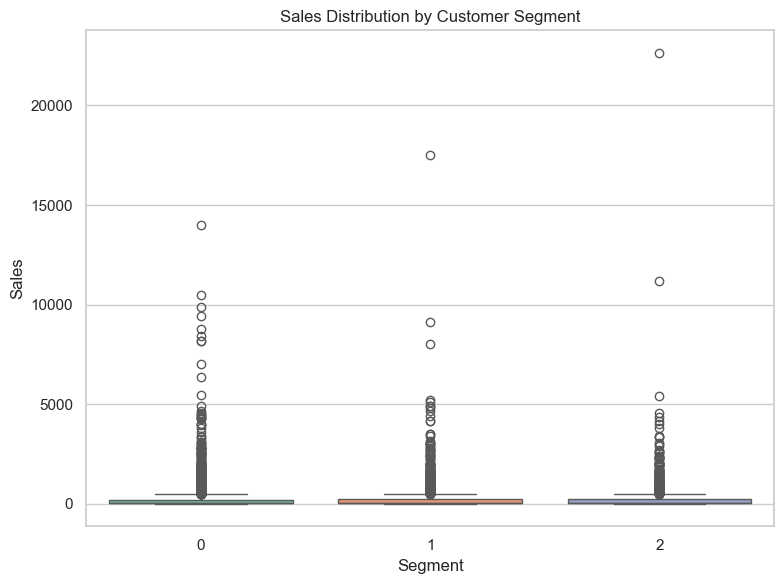

📝 Insight: The Consumer segment shows high variability in sales, indicating it has both low and high-value purchases.


In [132]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Segment', y='Sales', hue='Segment', palette='Set2', legend=False)
plt.title('Sales Distribution by Customer Segment')
plt.ylabel('Sales')
plt.xlabel('Segment')
plt.tight_layout()
plt.show()

print("📝 Insight: The Consumer segment shows high variability in sales, indicating it has both low and high-value purchases.")


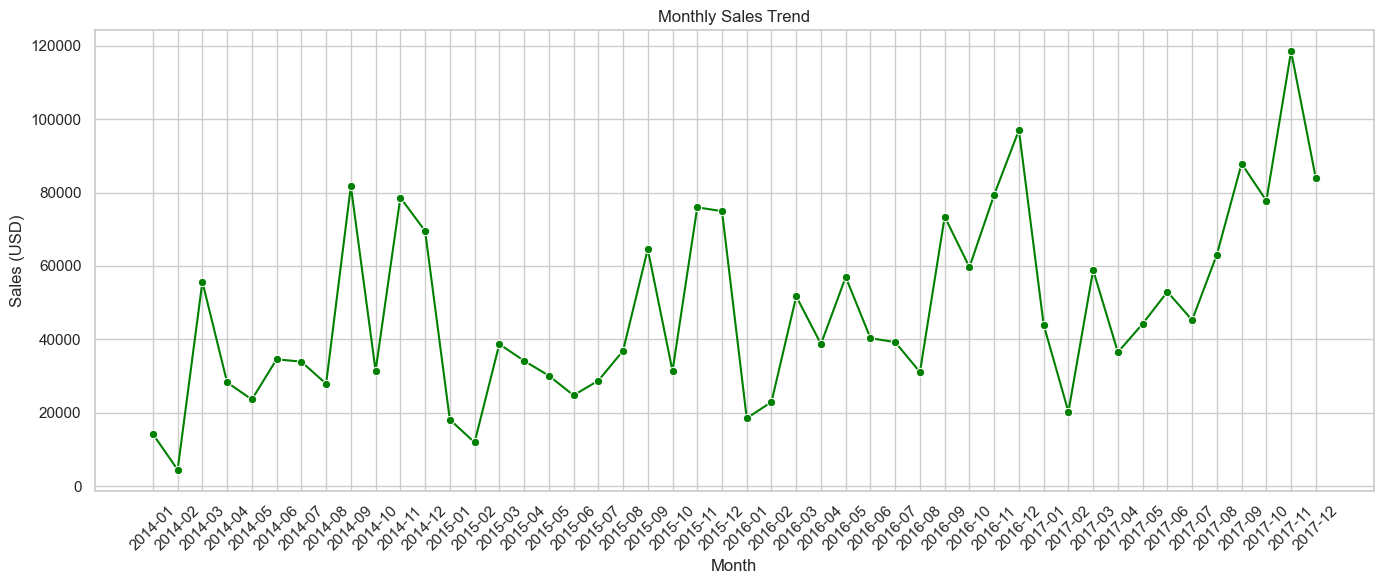

📝 Insight: Sales peak during year-end months, suggesting festive season shopping impact.


In [134]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', color='green')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales (USD)')
plt.tight_layout()
plt.show()

print("📝 Insight: Sales peak during year-end months, suggesting festive season shopping impact.")


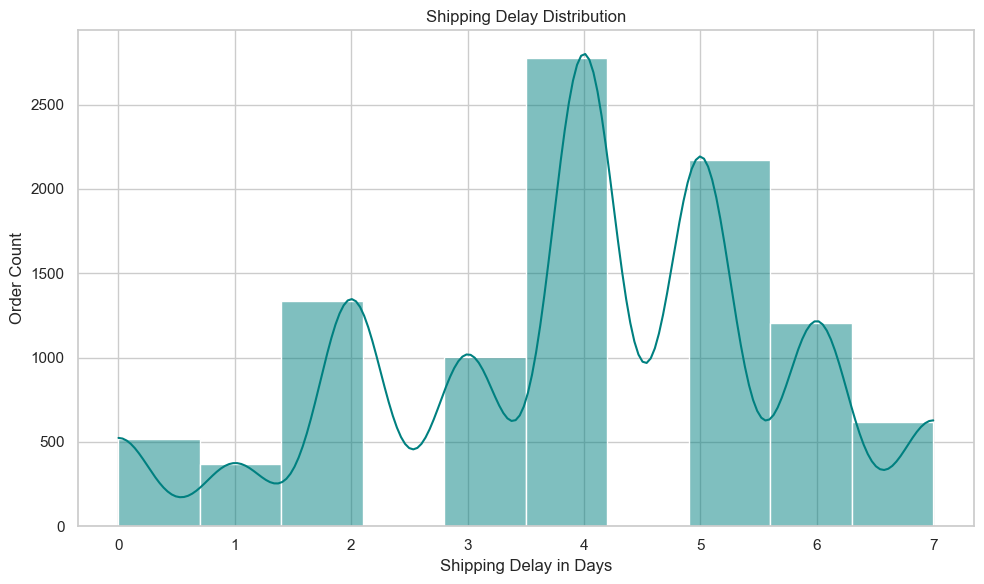

📝 Insight: Most orders are shipped within 3 days, indicating good logistics performance.


In [136]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Shipping Delay (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

plt.figure(figsize=(10,6))
sns.histplot(df['Shipping Delay (Days)'], bins=10, kde=True, color='teal')
plt.title('Shipping Delay Distribution')
plt.xlabel('Shipping Delay in Days')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

print("📝 Insight: Most orders are shipped within 3 days, indicating good logistics performance.")
